# 1

       CustomerID     Age  Annual Income (k$)  Spending Score (1-100)
count      200.00  200.00              200.00                  200.00
mean       100.50   38.85               60.56                   50.20
std         57.88   13.97               26.26                   25.82
min          1.00   18.00               15.00                    1.00
25%         50.75   28.75               41.50                   34.75
50%        100.50   36.00               61.50                   50.00
75%        150.25   49.00               78.00                   73.00
max        200.00   70.00              137.00                   99.00


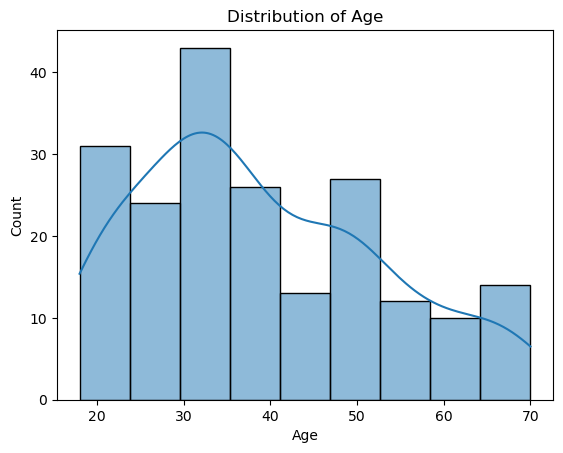

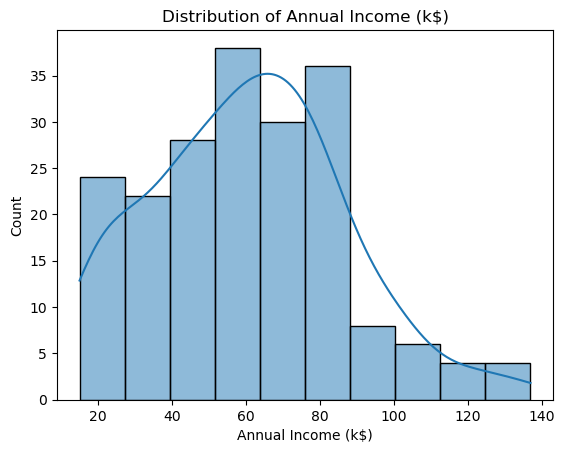

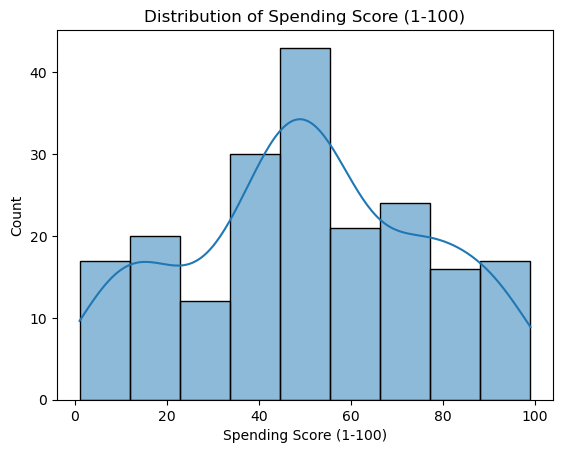

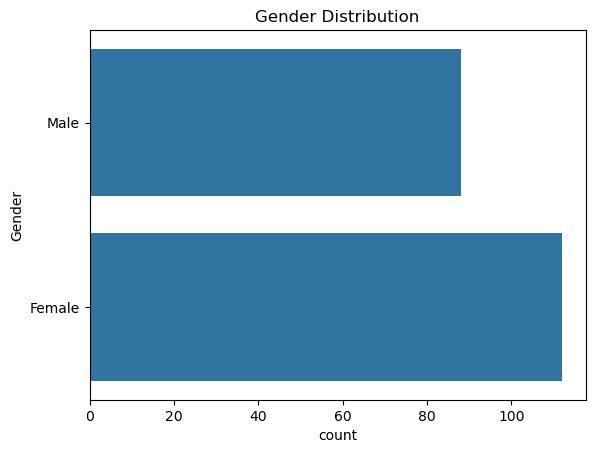

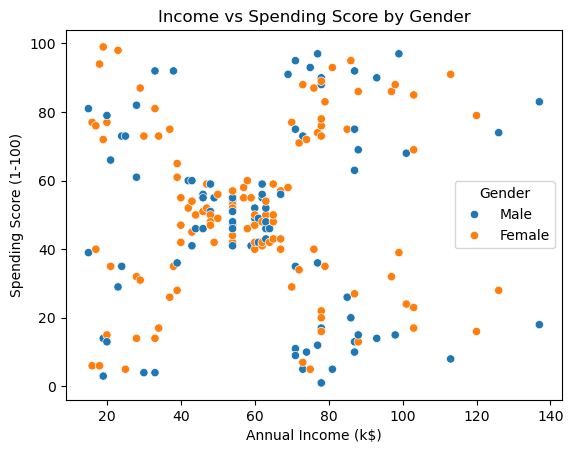

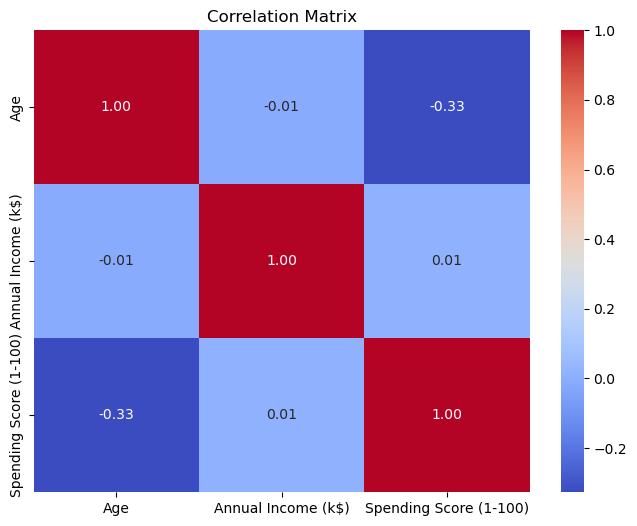

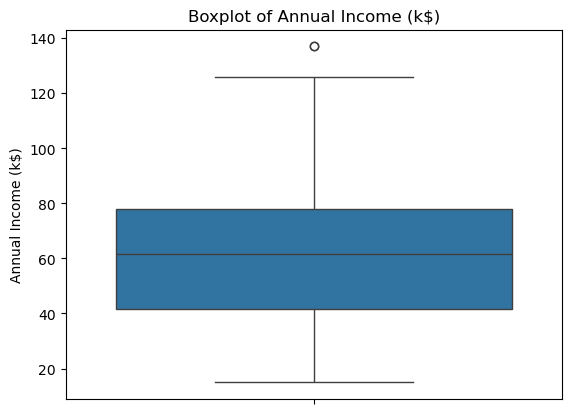

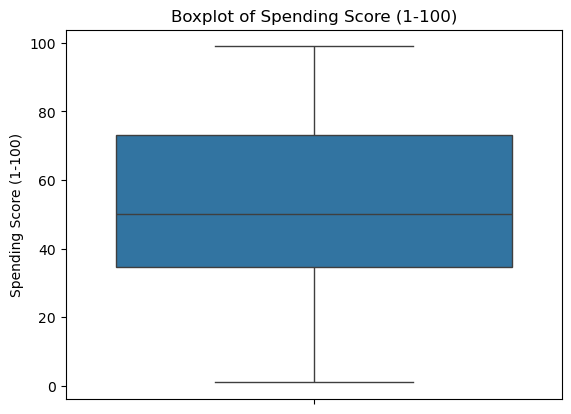

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Exploratory Data Analysis (EDA)
print(data.describe().round(2))


# Visualize the distribution of numerical features
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

# Visualize categorical features
sns.countplot(data['Gender'])
plt.title("Gender Distribution")
plt.show()

# Income vs Spending Score by Gender
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title("Income vs Spending Score by Gender")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Boxplots for Annual Income and Spending Score
for feature in ['Annual Income (k$)', 'Spending Score (1-100)']:
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


# 2

In [69]:
# Step 1: Check for missing values
print("Missing Values:\n",data.isnull().sum())

# Since there are no missing values in this dataset, no further action is required.

# Step 2: Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Save CustomerID for later reference
customer_ids = data['CustomerID']

# Drop the CustomerID column for clustering
data_clustering = data.drop('CustomerID', axis=1)

# Step 3: Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clustering)

# Convert the scaled data back to a DataFrame for clarity
scaled_df = pd.DataFrame(scaled_data, columns=data_clustering.columns)

# Display the preprocessed data
print("Preprocessed Data (First 5 rows):\n", scaled_df.head())

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Preprocessed Data (First 5 rows):
      Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


# 3

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

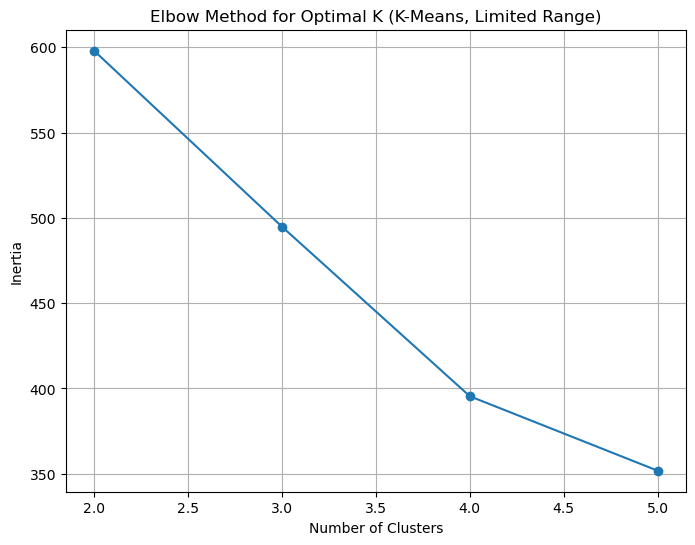

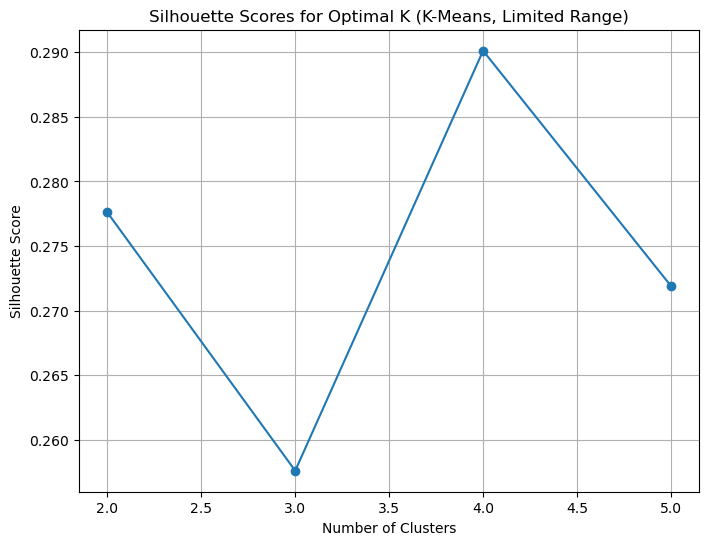

Optimal number of clusters based on silhouette score: 4


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


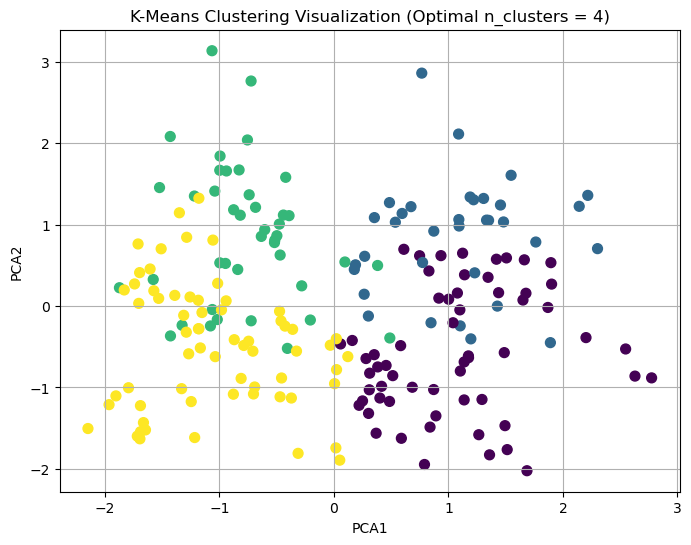

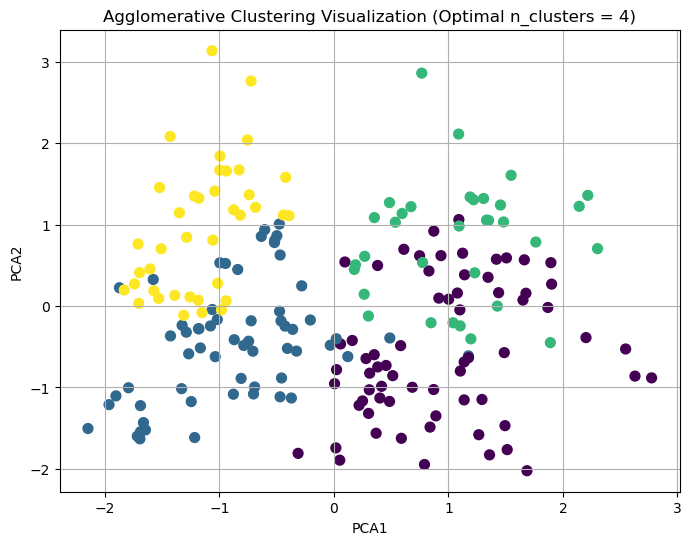

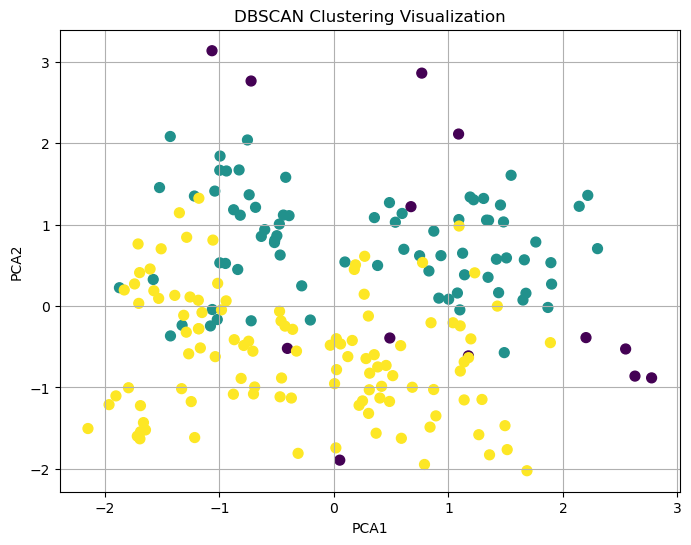

In [71]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Refine the range of clusters
range_n_clusters = range(2, 6)  # Test cluster sizes from 2 to 5

# Lists to store metrics
inertia = []
silhouette_scores = []

# Iterate over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Plot Elbow Method (K-Means Inertia)
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title("Elbow Method for Optimal K (K-Means, Limited Range)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()

# Plot Silhouette Scores for K-Means
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Optimal K (K-Means, Limited Range)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Choose the optimal number of clusters based on Silhouette Score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_n_clusters}")

# Apply K-Means Clustering with optimal n_clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Apply Agglomerative Clustering with optimal n_clusters
agglo = AgglomerativeClustering(n_clusters=optimal_n_clusters)
agglo_labels = agglo.fit_predict(scaled_data)

# Apply DBSCAN with optimized parameters
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Adjust eps based on k-distance plot
dbscan_labels = dbscan.fit_predict(scaled_data)

# Perform PCA for visualization (reduce data to 2 dimensions)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Convert reduced data to DataFrame for clarity
reduced_df = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])

# Add cluster labels for each algorithm to the reduced data
reduced_df['KMeans_Cluster'] = kmeans_labels
reduced_df['Agglo_Cluster'] = agglo_labels
reduced_df['DBSCAN_Cluster'] = dbscan_labels

# Visualize K-Means Clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PCA1'], reduced_df['PCA2'], c=reduced_df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title(f"K-Means Clustering Visualization (Optimal n_clusters = {optimal_n_clusters})")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid()
plt.show()

# Visualize Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PCA1'], reduced_df['PCA2'], c=reduced_df['Agglo_Cluster'], cmap='viridis', s=50)
plt.title(f"Agglomerative Clustering Visualization (Optimal n_clusters = {optimal_n_clusters})")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid()
plt.show()

# Visualize DBSCAN Clustering
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PCA1'], reduced_df['PCA2'], c=reduced_df['DBSCAN_Cluster'], cmap='viridis', s=50)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid()
plt.show()

# 4

In [73]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate K-Means Clustering
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_db = davies_bouldin_score(scaled_data, kmeans_labels)
evaluation_results['K-Means Silhouette Score'] = kmeans_silhouette
evaluation_results['K-Means Davies-Bouldin Index'] = kmeans_db

# Evaluate Agglomerative Clustering
agglo_silhouette = silhouette_score(scaled_data, agglo_labels)
agglo_db = davies_bouldin_score(scaled_data, agglo_labels)
evaluation_results['Agglomerative Silhouette Score'] = agglo_silhouette
evaluation_results['Agglomerative Davies-Bouldin Index'] = agglo_db

# Evaluate DBSCAN
if len(set(dbscan_labels)) > 1:  # Ensure DBSCAN produces more than one cluster
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    dbscan_db = davies_bouldin_score(scaled_data, dbscan_labels)
    evaluation_results['DBSCAN Silhouette Score'] = dbscan_silhouette
    evaluation_results['DBSCAN Davies-Bouldin Index'] = dbscan_db
else:
    evaluation_results['DBSCAN Silhouette Score'] = "Not Applicable (Single Cluster)"
    evaluation_results['DBSCAN Davies-Bouldin Index'] = "Not Applicable (Single Cluster)"

# Print Evaluation Results
print("Clustering Performance Metrics:")
for key, value in evaluation_results.items():
    print(f"{key}: {value}")


Clustering Performance Metrics:
K-Means Silhouette Score: 0.29010917402310876
K-Means Davies-Bouldin Index: 1.3055634908016425
Agglomerative Silhouette Score: 0.2632260518820244
Agglomerative Davies-Bouldin Index: 1.4019906658555517
DBSCAN Silhouette Score: 0.2543871824295202
DBSCAN Davies-Bouldin Index: 3.2331589558905027


K-Means Clustering

Silhouette Score: 0.2901

Indicates weak clustering as the score is closer to 0. A score closer to 1 is ideal for well-separated clusters.

Davies-Bouldin Index: 1.3056

A lower score is better. While this is relatively lower compared to the other methods, it still suggests moderately overlapping clusters.

Agglomerative Clustering

Silhouette Score: 0.2632

Slightly worse than K-Means, indicating weak cluster separation.

Davies-Bouldin Index: 1.4020

Higher than K-Means, suggesting less compact and more overlapping clusters.

DBSCAN

Silhouette Score: 0.2543

Lowest among the three algorithms, indicating poor cluster separation or noisy results.

Davies-Bouldin Index: 3.2331

The highest index, indicating poor compactness and separation. This might be due to suboptimal eps or min_samples values.